# Assignment 3

In [1]:
# !python3.11 -m pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("Assignment3Dataset.xlsx")
df

,y,x
0,1,2.175854
1,1,1.926569
2,4,2.849404
3,1,2.081834
4,1,2.171076
...,...,...
95,0,1.775641
96,2,2.760407
97,4,2.495913
98,3,2.694922


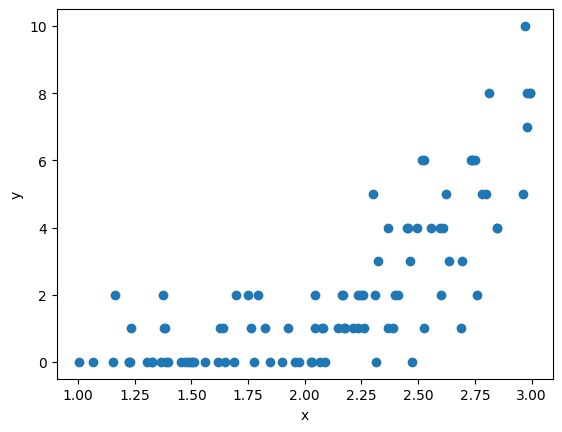

In [4]:
plt.scatter(df["x"], df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
def ln_P(theta):
    n = len(df)
    sum = 0
    for i in range(n):
        sum += df["y"].iloc[i]*(theta[0] + theta[1]*df["x"].iloc[i])
        sum -= np.exp(theta[0] + theta[1]*df["x"].iloc[i])

    return sum

In [6]:
#b
theta_0 = np.array([np.log(df["y"].mean()), 0])
burn_in = 1000
n_draws = 10000 + burn_in
theta = np.zeros((n_draws, 2))
theta[0] = theta_0
theta_cand = np.zeros((n_draws, 2))
cov = np.array([[0.2085, -0.0796], [-0.0796, 0.0311]])
accepted = 0

for i in range(1, n_draws):
    theta_tilde = sts.multivariate_normal.rvs(mean=theta[i-1], cov=cov)
    theta_cand[i] = theta_tilde
    alpha = min(np.exp(ln_P(theta_tilde) - ln_P(theta[i-1])), 1)
    U = sts.uniform.rvs()

    if U <= alpha:
        theta[i] = theta_tilde
        if i > burn_in:
            accepted += 1
    else:
        theta[i] = theta[i-1]

theta[burn_in:]

array([[-4.64606493,  2.24909419],
       [-4.64606493,  2.24909419],
       [-4.06767757,  2.03257429],
       ...,
       [-4.82728898,  2.34780449],
       [-4.2854843 ,  2.14929472],
       [-4.2854843 ,  2.14929472]])

In [7]:
accepted/(n_draws - burn_in)

0.5592

In [8]:
print(f"Beta_0: {np.corrcoef(theta[burn_in:-1, 0], theta[burn_in+1:, 0])[0,1]}")
print(f"Beta_1: {np.corrcoef(theta[burn_in:-1, 1], theta[burn_in+1:, 1])[0,1]}")

Beta_0: 0.818460176001605
Beta_1: 0.8174566420793431


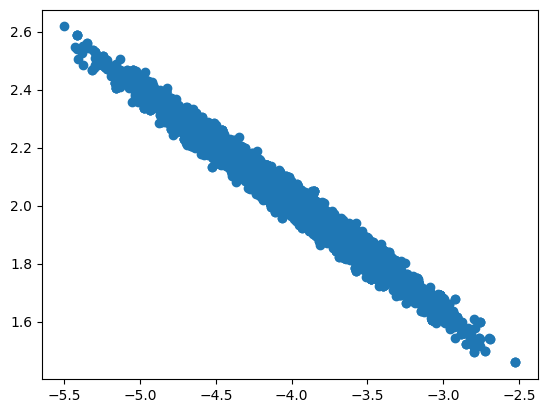

In [9]:
plt.scatter(theta[burn_in:, 0], theta[burn_in:, 1])
plt.show()

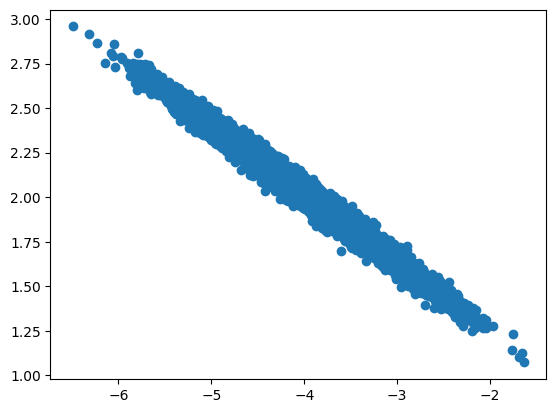

In [10]:
plt.scatter(theta_cand[burn_in:, 0], theta_cand[burn_in:, 1])
plt.show()

In [11]:
#c
theta_0 = np.array([np.log(df["y"].mean()), 0])
burn_in = 1000
n_draws = 10000 + burn_in
theta = np.zeros((n_draws, 2))
theta[0] = theta_0
theta_cand = np.zeros((n_draws, 2))
cov = np.array([[0.2085, 0], [0, 0.0311]])
accepted = 0

for i in range(1, n_draws):
    theta_tilde = sts.multivariate_normal.rvs(mean=theta[i-1], cov=cov)
    theta_cand[i] = theta_tilde
    alpha = min(np.exp(ln_P(theta_tilde) - ln_P(theta[i-1])), 1)
    U = sts.uniform.rvs()

    if U <= alpha:
        theta[i] = theta_tilde
        if i > burn_in:
            accepted += 1
    else:
        theta[i] = theta[i-1]

theta[burn_in:]

array([[-4.83764077,  2.33059503],
       [-4.83764077,  2.33059503],
       [-4.83764077,  2.33059503],
       ...,
       [-3.2702304 ,  1.75816543],
       [-3.2702304 ,  1.75816543],
       [-3.2702304 ,  1.75816543]])

In [12]:
accepted/(n_draws - burn_in)

0.124

In [13]:
print(f"Beta_0: {np.corrcoef(theta[burn_in:-1, 0], theta[burn_in+1:, 0])[0,1]}")
print(f"Beta_1: {np.corrcoef(theta[burn_in:-1, 1], theta[burn_in+1:, 1])[0,1]}")

Beta_0: 0.9750957903193255
Beta_1: 0.9750577924241515


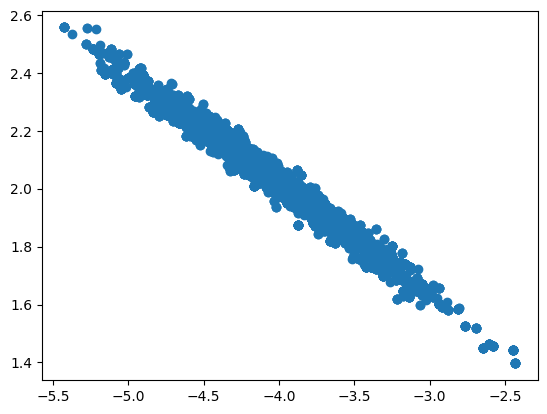

In [14]:
plt.scatter(theta[burn_in:, 0], theta[burn_in:, 1])
plt.show()

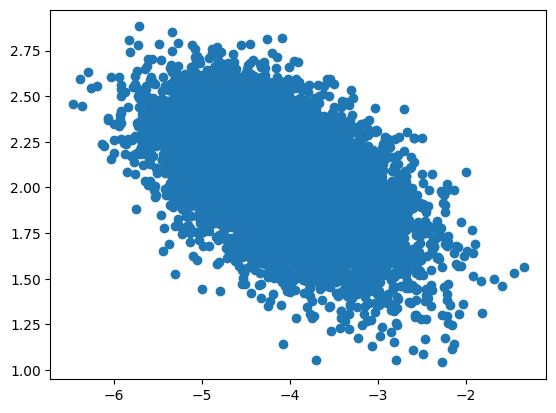

In [15]:
plt.scatter(theta_cand[burn_in:, 0], theta_cand[burn_in:, 1])
plt.show()